I will be working with the [Kaggle Heart Disease Data Set](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?select=heart.csv) stored in `heart.csv`. This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease. The following attributes are provided:

*Attribute Information:* (target: no disease=0, disease=1)

1. age 
2. sex (1 = male; 0 = female)
3. cp = chest pain type (4 values)
4. trestbps = resting blood pressure
5. chol = serum cholestoral in mg/dl
6. fbs = fasting blood sugar > 120 mg/dl
7. restecg = resting electrocardiographic results (values 0,1,2)
8. thalach = maximum heart rate achieved
9. exang = exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect.
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [1]:
#Import libraries
import numpy as np
import scipy.optimize as opt
import seaborn as sns
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

# Load Data from CSV File

In [2]:
df_heart_disease = pd.read_csv("heart.csv" , delimiter=",")
df_heart_disease[0:8]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0


# Using `isnull()` in the following cell, we can determine if DataFrame has any NaN values.

In [3]:
df_heart_disease.isnull().any().any()

False

#### There is no NaN

# Descriptive statistics:

In [4]:
df_heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# To determine which features have a great impact on target, I use Seaborn `heatmap()`.

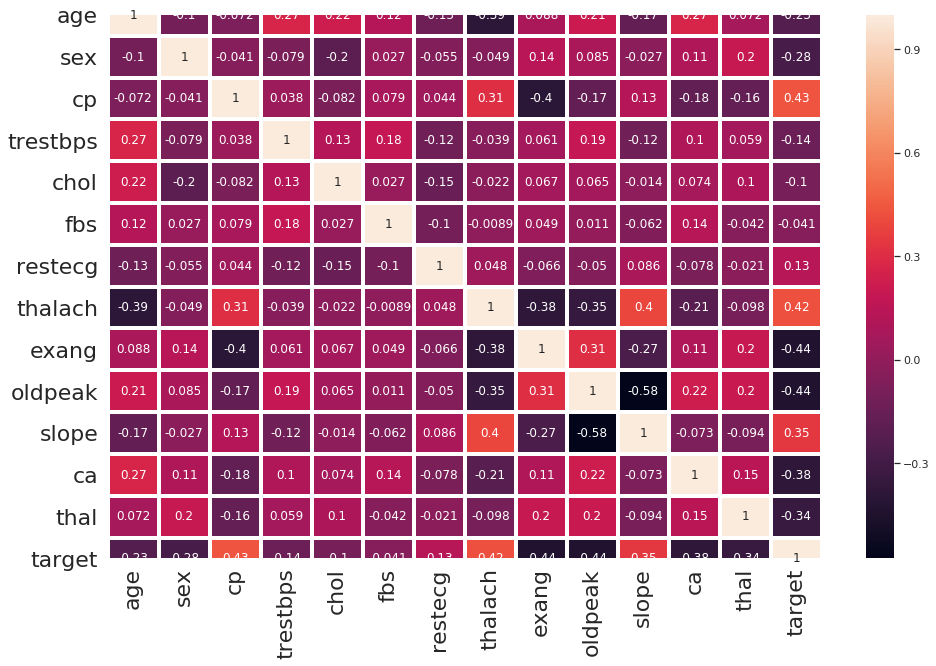

In [26]:
fig, ax = plt.subplots(figsize=(16,10))  
sns.set(font_scale=1.0)
sns.heatmap(df_heart_disease.corr() , annot= True, linewidths=3, ax=ax)

## Target is greatly influenced by cp(0.43), thalach(0.42) and slope(0.35). I would like to visualize the relationship between these three features and the target.

### Data Visualization and Analysis:

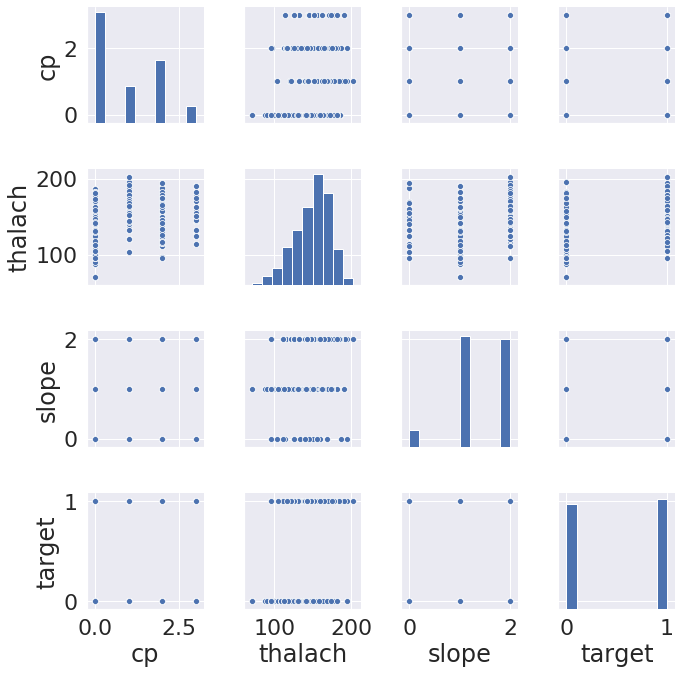

In [6]:
cdf = df_heart_disease[['cp', 'thalach', 'slope', 'target']] 
sns.set(font_scale=2.0)
sns.pairplot(cdf)

## Split the DataFrame into X (the data) and y (the labels), where:

In [7]:
X = df_heart_disease[['cp', 'thalach', 'slope']]
y = df_heart_disease['target'] # label

## Using train_test_split, split X and y into training and test sets

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# Normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVC

### Using `X_train` and `y_train` from the preceeding cell, train a `SVC` with default parameters. 

In [9]:
from sklearn.svm import SVC
SVClf = SVC()      #SVClf = SVC Classifier
SVClf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Model Accuracy

In [10]:
from sklearn import metrics
print('Accuracy of SVC on train set: {:.2f}' .format(SVClf.score(X_train, y_train)))
print('Accuracy of SVC on test set: {:.2f}' .format(SVClf.score(X_test, y_test)))

Accuracy of SVC on train set: 0.90
Accuracy of SVC on test set: 0.87


### Using this model, 87% of heart disease can be distinguished. 

### For SVC, I create a `precision-recall curve ` and a `roc curve ` using y_test. 

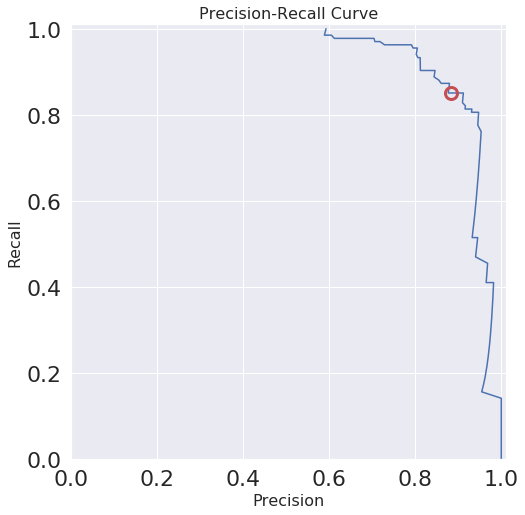

In [11]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc

y_scores = SVClf.decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure(figsize=(12, 8))
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle ='none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.title('Precision-Recall Curve', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

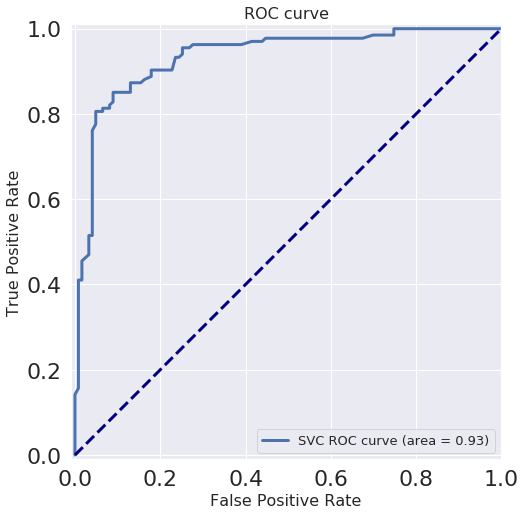

In [12]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.figure(figsize=(12, 8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='SVC ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

# DecisionTreeClassifier

### Using `X_train` and `y_train`, train a `DecisionTreeClassifier` with default parameters and random_state=0. 

In [13]:
DTClf = DecisionTreeClassifier(random_state = 0)  #DTClf = Decision Tree Classifier
DTClf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [14]:
Model_Prediction = DTClf.predict(X_test)

### In order to show easily the differences between model-based prediction and real values, I create a dataframe.

In [15]:
d = {'real or true values(y_test)': y_test, 'Model_Prediction': Model_Prediction}
dfC = pd.DataFrame(data=d)
dfC.head(10)

,real or true values(y_test),Model_Prediction
807,1,1
27,0,0
77,0,0
406,1,1
886,0,0
1,0,0
230,0,0
685,0,0
925,0,0
731,0,0


### Model Accuracy

In [16]:
print('Accuracy of Decision Tree classifier on train set: {:.2f}' .format(DTClf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}' .format(DTClf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on train set: 0.94
Accuracy of Decision Tree classifier on test set: 0.91


### Using this model, 91% of heart disease can be distinguished. My accuracy improved by 4%

# KNeighborsClassifier 


### Using `X_train` and `y_train`, train a `KNeighborsClassifier ` with default parameters and n_neighbors=1. 

In [17]:
from sklearn.neighbors import KNeighborsClassifier
KNClf = KNeighborsClassifier(n_neighbors = 1)  # KNClf= KNeighborsClassifier
KNClf.fit(X_train_scaled, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### Model prediction

In [18]:
Model_Prediction_knn = KNClf.predict(X_test_scaled)
Model_Prediction_knn

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

### Model Accuracy

In [19]:
print('Accuracy of KNeighborsClassifier on train set: {:.2f}' .format(KNClf.score(X_train_scaled, y_train)))
print('Accuracy of KNeighborsClassifier on test set: {:.2f}' .format(KNClf.score(X_test_scaled, y_test)))

Accuracy of KNeighborsClassifier on train set: 0.93
Accuracy of KNeighborsClassifier on test set: 0.92


### Using this model, 92% of heart disease can be distinguished. My accuracy improved by 1%

### Is `n_neighbors = 1 ` the best value? Yes, because:

In [20]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_scaled, y_train)
    yhat = neigh.predict(X_test_scaled)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc

array([0.91828794, 0.85214008, 0.83268482, 0.80933852, 0.78210117,
       0.78599222, 0.80155642, 0.79766537, 0.78599222, 0.77821012,
       0.76653696, 0.75486381, 0.75875486, 0.77431907])

### To better understand, I visualize previous cell to see better the relationship between `Accuracy ` and `Number of Neighbors(K)`.

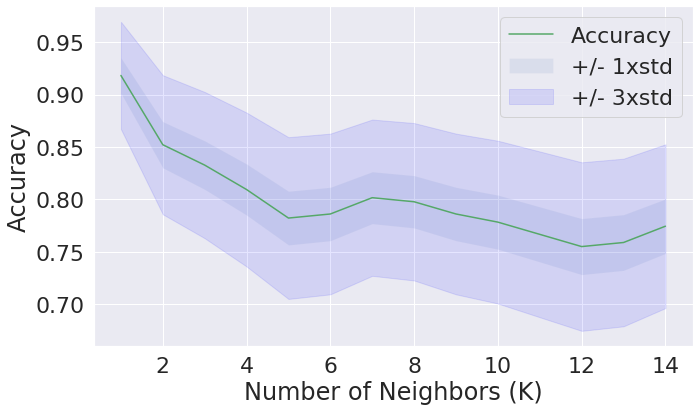

In [21]:
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 16})
plt.plot(range(1,Ks), mean_acc, 'g')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha=0.10, color='blue')
plt.legend(('Accuracy', '+/- 1xstd', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [22]:
print("The best accuracy is {:.2f}" .format(mean_acc.max()), "with k =", mean_acc.argmax()+ 1)

The best accuracy is 0.92 with k = 1


### confusion_matrix

In [23]:
from sklearn.metrics import classification_report, confusion_matrix 
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt='.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i , j] , fmt),
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True target')
    plt.xlabel('Predicted target')
#print(confusion_matrix(y_test, Model_Prediction_knn, labels=[1,0]))

Confusion matrix, without normalization
[[120  14]
 [  7 116]]


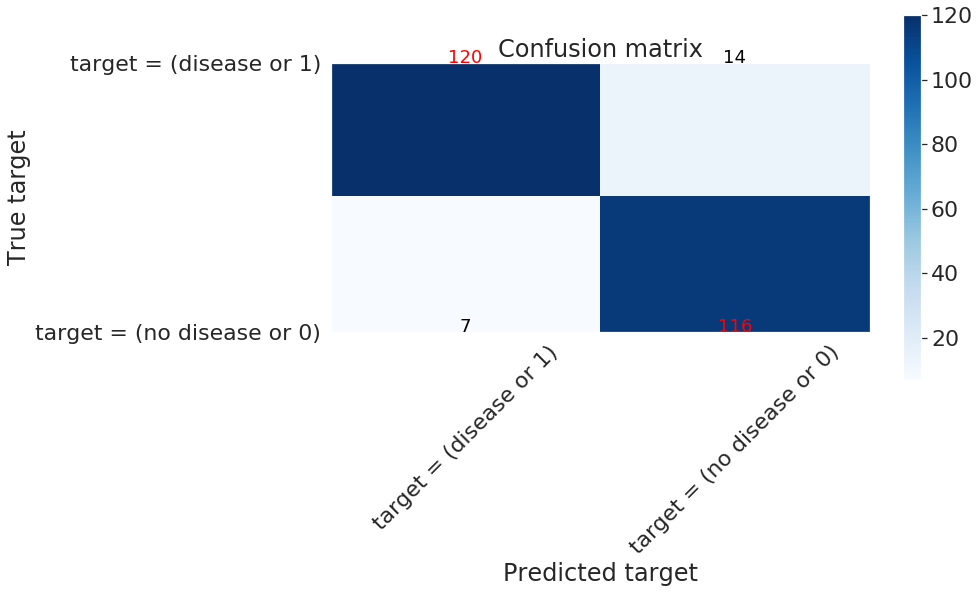

In [24]:
cnf_matrix = confusion_matrix(y_test, Model_Prediction_knn, labels=[1,0])
np.set_printoptions(precision=3)

plt.figure(figsize=(14, 8))
plt.grid(False)
plt.rcParams.update({'font.size': 18})
plot_confusion_matrix(cnf_matrix, classes=['target = (disease or 1)', 'target = (no disease or 0)'], normalize = False)

In [25]:
print(classification_report(y_test, Model_Prediction_knn))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       123
           1       0.94      0.90      0.92       134

    accuracy                           0.92       257
   macro avg       0.92      0.92      0.92       257
weighted avg       0.92      0.92      0.92       257

